In [ ]:
%matplotlib inline
import numpy as np
import pylab as plt


# Loading data from disk
data = np.load('/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m000_856MHz_1MHz_857channels_Jones.npy')


(-0.5, 511.5, 511.5, -0.5)

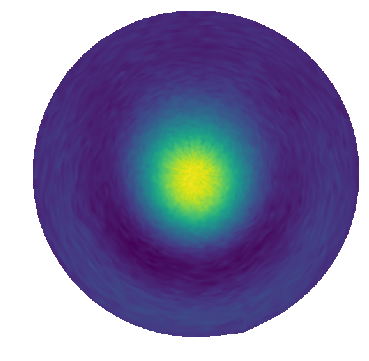

In [32]:
# visualising the beam
chan = 500
# dat = (np.real(data[chan,1,1,:,:])**2+np.imag(data[chan,1,1,:,:])**2)**.5
dat = np.real(data[chan,1,1,:,:])
plt.figure(figsize=(6,6))
plt.imshow(dat)
plt.axis('off')

In [34]:
import pyfits
header = pyfits.open('/home/iheanetu/images/ant5RRreal.fits')[0].header


In [37]:
xpl,ypl = 512,512
nchan = 850

header['NAXIS1'] = xpl
header['NAXIS2'] = ypl
header['NAXIS3'] = nchan
# header['BUNIT'] = '        '
header['CRVAL1'] = 8.6500
header['CRVAL2'] = -0.1328
header['CRVAL3'] = 900000000.0
header['CRPIX1'] = xpl/2-1
header['CRPIX2'] = ypl/2-1
header['CRPIX3'] = 1
header['CDELT1'] = 6./xpl
header['CDELT2'] = 6./ypl
header['CDELT3'] = 1000000.0
header['CUNIT1'] = 'DEG     '
header['CUNIT2'] = 'DEG     '  
header['CUNIT3'] = 'HZ      ' 
header['CTYPE1'] = 'X       '
header['CTYPE2'] = 'Y       '
header['CTYPE3'] = 'FREQ    '

header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
NAXIS3  =                  850                                                  
BUNIT   = '        '                                                            
CRVAL1  =                 8.65                                                  
CRVAL2  =              -0.1328                                                  
CRVAL3  =          900000000.0                                                  
CRPIX1  =                  255                                                  
CRPIX2  =                  255                                                  
CRPIX3  =                   

In [ ]:
mask = (np.abs(beam) > 2).astype(int)
masked_array(hdu[pol,reim].data[ichan,:,:], mask)

In [44]:
import numpy as np
a = np.array(range(10))
print a
a[a>5]=0
a

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4, 5, 0, 0, 0, 0])

In [49]:
np.linspace(-1,1,(1--1)/0.001).shape

/home/iheanetu/vitualdrive/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(2000,)

In [ ]:
import pyfits, numpy as np

maskout_nans = lambda a : np.nan_to_num(a)

pol = {'00':'rr', '10': 'lr', '01':'rl', '11':'ll'}
hdu = pyfits.open('/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m000_256px_856MHz_1MHz_857channels_Jones.fits')[0]
for i in range(2):
    for j in range(2):
        #hdu = pyfits.open('/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m000_256px_856MHz_1MHz_857channels_Jones.fits')[0]
        #hdu.data = hdu.data[0,:, i, j, :, :]
        data = hdu.data[0,:, i, j, :, :]
        #data = [k for k in hdu.data[0,:, i, j, :, :]]
        fname = 'khan/1487813282_m000_256px_856MHz_1MHz_857channels_Jones_%s_re.fits'%pol[str(i)+str(j)]
        #hdu.writeto(fname,clobber=True)
        #pyfits.writeto(fname, newdata[pol,reim], header=hdu[pol,reim].header,clobber=True)
        pyfits.writeto(fname, data, header=hdu.header,clobber=True)

        #hdu = pyfits.open('/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m000_256px_856MHz_1MHz_857channels_Jones.fits')[0]
        hdu.data = hdu.data[1,:, i, j, :, :]
        #data = [maskout_nans(k) for k in hdu.data[1,:, i, j, :, :]]
        fname = 'khan/1487813282_m000_256px_856MHz_1MHz_857channels_Jones_%s_im.fits'%pol[str(i)+str(j)]
        #hdu.writeto(fname,clobber=True)
        pyfits.writeto(fname, data, header=hdu.header,clobber=True)


In [14]:
import pyfits, numpy as np

maskout_nans = lambda a : np.nan_to_num(a)

pol = {'00':'rr', '10': 'lr', '01':'rl', '11':'ll'}
hdu = pyfits.open('/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m000_256px_856MHz_1MHz_857channels_Jones.fits')[0]
for i in range(2):
    for j in range(2):

        data = hdu.data[0,:, i, j, :, :]

        fname = 'khan/1487813282_m000_256px_856MHz_1MHz_857channels_Jones_%s_re.fits'%pol[str(i)+str(j)]

        pyfits.writeto(fname, data, header=hdu.header,clobber=True)

        hdu.data = hdu.data[1,:, i, j, :, :]

        fname = 'khan/1487813282_m000_256px_856MHz_1MHz_857channels_Jones_%s_im.fits'%pol[str(i)+str(j)]

        pyfits.writeto(fname, data, header=hdu.header,clobber=True)


In [28]:

for i in hdu.header.keys() :
    if (i in header2.keys()):
        print i,'\t\t',hdu.header[i],'\t\t',header2[i]

SIMPLE 		True 		True
BITPIX 		-64 		-64
NAXIS 		6 		3
NAXIS1 		256 		512
NAXIS2 		256 		512
NAXIS3 		2 		500
CTYPE1 		AZIMUTH 		RA---SIN
CRVAL1 		-34.9988218169 		0.127680996243
CDELT1 		0 		-0.01171875
CUNIT1 		deg 		DEG
CTYPE2 		ELEVATION 		DEC--SIN
CRVAL2 		51.0806143847 		-0.146874990003
CDELT2 		0 		0.01171875
CUNIT2 		deg 		DEG
CTYPE3 		JONES0 		FREQ
CRVAL3 		0 		900000000.0
CDELT3 		1 		1.0
CUNIT3 		 		Hz


In [27]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    6 / number of array dimensions                     
NAXIS1  =                  256                                                  
NAXIS2  =                  256                                                  
NAXIS3  =                    2                                                  
NAXIS4  =                    2                                                  
NAXIS5  =                  857                                                  
NAXIS6  =                    2                                                  
ID      = '1487813282'                                                          
CTYPE1  = 'AZIMUTH '                                                            
CRVAL1  =   -34.99882181685663                                                  
CDELT1  =                   

In [29]:
header2

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
NAXIS3  =                  500                                                  
CRVAL1  =   0.1276809962429886                                                  
CRVAL2  =   -0.146874990002695                                                  
CRVAL3  =          900000000.0                                                  
CRPIX1  =                255.0                                                  
CRPIX2  =                255.0                                                  
CRPIX3  =                  1.0                                                  
CDELT1  =          -0.011718

In [18]:
header2 = pyfits.open('1487813282_m00_900MHz_1MHz_500channels_Jones_scaled_YY_re.fits')[0].header


In [ ]:
header2

NAXIS1  =                  512                                                  
NAXIS2  =                  512                                                  
NAXIS3  =                  500                                                  
CRVAL1  =   0.1276809962429886                                                  
CRVAL2  =   -0.146874990002695                                                  
CRVAL3  =          900000000.0                                                  
CRPIX1  =                255.0                                                  
CRPIX2  =                255.0                                                  
CRPIX3  =                  1.0                                                  
CDELT1  =          -0.01171875                                                  
CDELT2  =           0.01171875                                                  
CDELT3  =                  1.0                                                  
CUNIT1  = 'DEG     '                                                            
CUNIT2  = 'DEG     '                                                            
CUNIT3  = 'Hz      '                                                            
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CTYPE3  = 'FREQ    '                                                            